In [1]:
import re

import pandas as pd
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt


%matplotlib inline

In [15]:
df = pd.read_json(r"Tourpedia\Places-Statistics")
df.reset_index()
df.head()

,Amsterdam,Paris,London,Barcelona,Rome,Berlin,Dubai,Tuscany
accommodation,1393,3397,4372,2450,5207,2887,1515,11333
attraction,3185,4351,20727,2390,7317,9660,5038,18140
poi,10441,26927,80510,10778,20881,28888,7105,45663
restaurant,5241,21854,50930,8411,15249,16486,7342,32812


In [16]:
df_describtion = df.describe()
df_describtion.drop('count', inplace=True)
df_describtion.drop('25%', inplace=True)
df_describtion.drop('50%', inplace=True)
df_describtion.drop('75%', inplace=True)
df_describtion.drop('max', inplace=True)
df_describtion = df_describtion.transpose()
df_describtion

,mean,std,min
Amsterdam,5065.00,3913.665630,1393.0
Paris,14132.25,12031.202416,3397.0
London,39134.75,33656.763970,4372.0
Barcelona,6007.25,4253.492477,2390.0
Rome,12163.50,7243.308889,5207.0
Berlin,14480.25,11094.210934,2887.0
Dubai,5250.00,2696.458047,1515.0
Tuscany,26987.00,15341.020457,11333.0


In [17]:
for idx in df.index:
    df.loc[idx] = df.loc[idx] / df.loc[idx].sum() * 100

In [18]:
df.head()

,Amsterdam,Paris,London,Barcelona,Rome,Berlin,Dubai,Tuscany
accommodation,4.279044,10.434970,13.429993,7.525957,15.994962,8.868342,4.653806,34.812926
attraction,4.498079,6.144786,29.272116,3.375325,10.333578,13.642526,7.115015,25.618574
poi,4.516140,11.646979,34.823719,4.661906,9.031848,12.495188,3.073190,19.751031
restaurant,3.310279,13.803253,32.168009,5.312490,9.631454,10.412759,4.637297,20.724459


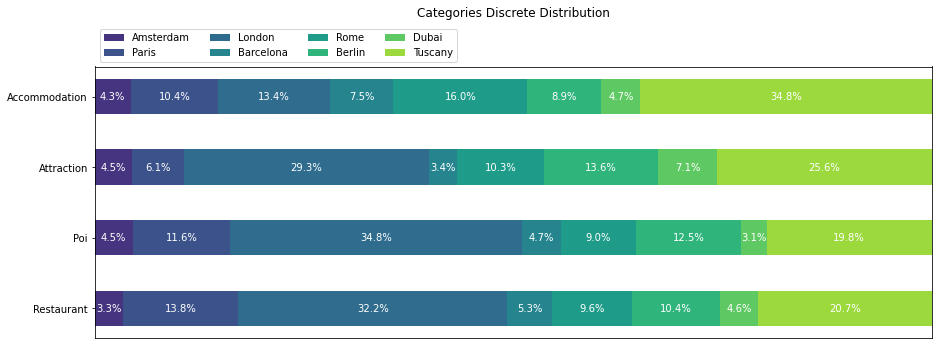

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def survey(df):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(map(str.capitalize, df.index))
    
    data = df.to_numpy()

    data_cum = data.cumsum(axis=1)
    
    category_colors = plt.get_cmap('viridis')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(df.columns, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(round(c, 1)) + '%', ha='center', va='center',
                    color=text_color)
    
    ax.legend(ncol=len(df.index), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
    ax.set_title("Categories Discrete Distribution", pad =50)
    return fig, ax


survey(df)
plt.show()

In [21]:
dataframes = [pd.read_json(f'Tourpedia\\{place}-places') for place in df.columns]

In [22]:
places_df = pd.concat(dataframes)

In [23]:
places_df.head()

,id,name,address,category,location,lat,lng,numReviews,reviews,polarity,details,originalId,subCategory
0,223771,American Hotel,"Leidsekade 97, Amsterdam, Netherlands",accommodation,Amsterdam,52.363826,4.881369,5.0,http://tour-pedia.org/api/getReviewsByPlaceId?...,8.0,http://tour-pedia.org/api/getPlaceDetails?id=2...,NaN,NaN
1,223776,Hotel Espresso City Center,"Overtoom 57, Amsterdam, Netherlands",accommodation,Amsterdam,52.362864,4.876344,5.0,http://tour-pedia.org/api/getReviewsByPlaceId?...,0.0,http://tour-pedia.org/api/getPlaceDetails?id=2...,NaN,NaN
2,223778,Hotel Amsterdam,"Damrak 93-94, Amsterdam, Netherlands",accommodation,Amsterdam,52.373690,4.893623,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=2...,NaN,NaN
3,223779,Hampshire Boutique Hotel - Sebastian's,"Keizersgracht 15, Amsterdam, Netherlands",accommodation,Amsterdam,52.379109,4.889793,3.0,http://tour-pedia.org/api/getReviewsByPlaceId?...,6.0,http://tour-pedia.org/api/getPlaceDetails?id=2...,NaN,NaN
4,223793,NL Hotel,"Frans van Mierisstraat 34, Amsterdam, Netherlands",accommodation,Amsterdam,52.354664,4.882476,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=2...,NaN,NaN


In [24]:
tdf = places_df.groupby('category').count()
tdf.drop('undefined', inplace=True)

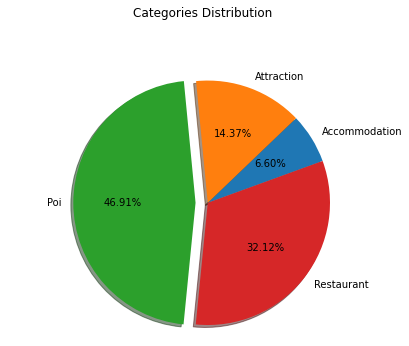

In [25]:
categories = np.array(list(map(str.capitalize, tdf.index)))
explode = (0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(tdf['id'], explode=explode, labels=categories, autopct='%1.2f%%',
        shadow=True, startangle=20)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Categories Distribution", pad=50)
plt.show()

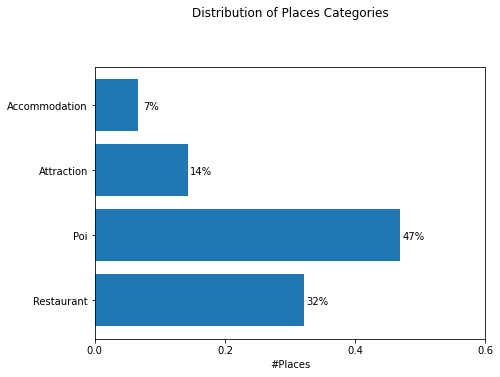

In [26]:
y_pos = np.arange(0, 4)
x_pos = np.arange(0, 0.8, 0.2)
fig, ax = plt.subplots(figsize=(7, 5))
ax.barh(y_pos, tdf['id']/tdf['id'].sum(), align='center')
ax.set_yticks(y_pos)
ax.set_xticks(x_pos)
ax.set_yticklabels(categories)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('#Places')

rects = ax.patches

total = tdf['id'].sum()

for rect, value in zip(rects, tdf['id']):
    value = value / total
    width = rect.get_width()
    ax.text(rect.get_x() + rect.get_width() + 0.02, rect.get_y() + 0.5, str(int(round(value, 2) * 100)) + '%' ,ha='center', va='bottom')

ax.set_title("Distribution of Places Categories", pad=50)
plt.show()
# ax.set_title('How fast do you want to go today?')

In [36]:
import json

f = open(r"Tourpedia\Reviews-Statistics")
data = json.load(f)
for k in data.keys():
    for key in data[k].keys():
        data[k][key] = data[k][key]['en']

stats_rev = pd.DataFrame(data).transpose()
# stats_rev.drop('count', inplace=True)

In [37]:
stats_rev

,accommodation,attraction,poi,restaurant
Amsterdam,3297,5047,1481,13041
Paris,4550,5740,1297,14836
London,11625,43482,29637,115732
Barcelona,3099,4602,1225,8613
Rome,2864,3057,641,6603
Berlin,3166,6018,2064,16515
Dubai,4028,6659,4434,21873
Tuscany,2987,3162,551,5569


In [38]:
df = stats_rev.describe()

df.drop('count', inplace=True)
df.drop('25%', inplace=True)
df.drop('50%', inplace=True)
df.drop('75%', inplace=True)
df.drop('max', inplace=True)
df.transpose()

,mean,std,min
accommodation,4452.000,2955.085399,2864.0
attraction,9720.875,13702.040249,3057.0
poi,5166.250,9963.087484,551.0
restaurant,25347.750,36924.582314,5569.0


In [41]:
df = stats_rev.transpose().describe()
df.drop('count', inplace=True)
df.drop('25%', inplace=True)
df.drop('50%', inplace=True)
df.drop('75%', inplace=True)
df.drop('max', inplace=True)
df = df.transpose()
df

,mean,std,min
Amsterdam,5716.50,5095.421834,1481.0
Paris,6605.75,5799.295151,1297.0
London,50119.00,45645.065078,11625.0
Barcelona,4384.75,3139.133041,1225.0
Rome,3291.25,2465.017157,641.0
Berlin,6940.75,6596.695101,2064.0
Dubai,9248.50,8495.421139,4028.0
Tuscany,3067.25,2049.852413,551.0


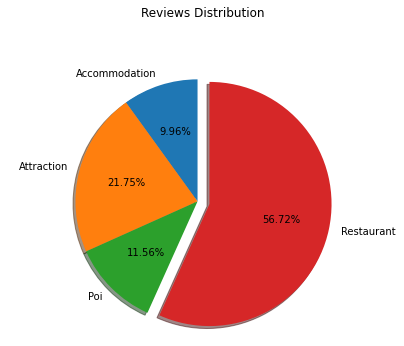

In [42]:
explode = (0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Reviews Distribution", pad=50)
plt.show()

In [43]:
stats_rev_describtion = stats_rev.transpose().describe()
stats_rev_describtion.drop('count', inplace=True)
stats_rev_describtion

,Amsterdam,Paris,London,Barcelona,Rome,Berlin,Dubai,Tuscany
mean,5716.500000,6605.750000,50119.000000,4384.750000,3291.250000,6940.750000,9248.500000,3067.250000
std,5095.421834,5799.295151,45645.065078,3139.133041,2465.017157,6596.695101,8495.421139,2049.852413
min,1481.000000,1297.000000,11625.000000,1225.000000,641.000000,2064.000000,4028.000000,551.000000
25%,2843.000000,3736.750000,25134.000000,2630.500000,2308.250000,2890.500000,4332.500000,2378.000000
50%,4172.000000,5145.000000,36559.500000,3850.500000,2960.500000,4592.000000,5546.500000,3074.500000
75%,7045.500000,8014.000000,61544.500000,5604.750000,3943.500000,8642.250000,10462.500000,3763.750000
max,13041.000000,14836.000000,115732.000000,8613.000000,6603.000000,16515.000000,21873.000000,5569.000000
